#**IMPORT THE LIBRARIES**





In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

#**IMPORT THE DATA**


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving takehome_user_engagement.csv to takehome_user_engagement.csv


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving takehome_users.csv to takehome_users.csv


In [ ]:
df=pd.read_csv('takehome_user_engagement.csv')

In [ ]:
df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [ ]:
#Let us check to type of time_stamp
df.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [ ]:
#Let us check if there are duplicate rows
df[df.duplicated()==True]

,time_stamp,user_id,visited


In [ ]:
#Let us convert "time_stamp" to date_time
df['time_stamp']=pd.to_datetime(df['time_stamp'])
df.set_index('time_stamp', inplace=True)
df.dtypes

user_id    int64
visited    int64
dtype: object

In [ ]:

df.dtypes

user_id    int64
visited    int64
dtype: object

In [ ]:
df.shape

(207917, 2)

In [ ]:
#We will sort the value by 'time_stamp'
df=df.sort_values(by=['time_stamp'])
df.head()

,user_id,visited
time_stamp,,
2012-05-31 08:20:06,10012,1
2012-05-31 15:47:36,3428,1
2012-05-31 17:19:37,9899,1
2012-05-31 21:58:33,1693,1
2012-06-01 00:17:30,6102,1


In [ ]:
#Let us check if there are duplicate rows
df[df.duplicated()==True]

,user_id,visited
time_stamp,,
2012-06-04 00:28:47,3514,1
2012-06-04 06:23:51,7170,1
2012-06-05 16:44:54,2568,1
2012-06-05 21:58:33,1693,1
2012-06-06 20:33:31,6047,1
...,...,...
2014-06-04 23:30:50,7859,1
2014-06-04 23:32:13,4625,1
2014-06-04 23:34:04,9325,1


It looks like the data have a lot of duplicated values, but as we can see there are not identical rows in this data.

In [ ]:
#We group our data by 'user_id' and group rows by week (Here we use resample() to do that.). This will gives us the weekly number of visit of each user.
df_group= df.groupby('user_id').resample('1W').sum()

In [ ]:
df_group.head(40)

user_id  visited
user_id time_stamp                  
1       2014-04-27        1        1
2       2013-11-17        2        1
        2013-11-24        0        0
        2013-12-01        2        1
        2013-12-08        0        0
        2013-12-15        2        1
        2013-12-22        0        0
        2013-12-29        2        1
        2014-01-05        2        1
        2014-01-12        2        1
        2014-01-19        0        0
        2014-01-26        0        0
        2014-02-02        0        0
        2014-02-09        6        3
        2014-02-16        4        2
        2014-02-23        0        0
        2014-03-02        0        0
        2014-03-09        2        1
        2014-03-16        2        1
        2014-03-23        0        0
        2014-03-30        0        0
        2014-04-06        2        1
3       2013-03-24        3        1
4       2013-05-26        4        1
5       2013-01-27        5        1
6       2013-12-22        6        1
7       2012-12-23        7        1
10      2013-01-20       10        1
        2013-01-27       10        1
        2013-02-03       10        1
        2013-02-10       20        2
        2013-02-17       20        2
        2013-02-24       10        1
        2013-03-03       30        3
        2013-03-10       20        2
        2013-03-17       20        2
        2013-03-24       20        2
        2013-03-31       10        1
        2013-04-07       10        1
        2013-04-14       30        3

In [ ]:
df_group.shape
len(df_group)

82282

In [ ]:
#let us drop 'user_id'
df_group=df_group.drop(columns='user_id', axis=1)

In [ ]:
df_group.head()

visited
user_id time_stamp         
1       2014-04-27        1
2       2013-11-17        1
        2013-11-24        0
        2013-12-01        1
        2013-12-08        0

In [ ]:
#Let us create a column called 'adopted_user' and set it to zero
df_group['adopted_user']=0

In [ ]:
df_group.head()

visited  adopted_user
user_id time_stamp                       
1       2014-04-27        1             0
2       2013-11-17        1             0
        2013-11-24        0             0
        2013-12-01        1             0
        2013-12-08        0             0

In [ ]:
#Let put the correct value into the 'adopted_user' column
for i in range(len(df_group)-1):
  if df_group['visited'].iloc[i]<3:
    df_group['adopted_user'].iloc[i]=0
  else:
    df_group['adopted_user'].iloc[i]=1

In [ ]:
df_group.head(40)

visited  adopted_user
user_id time_stamp                       
1       2014-04-27        1             0
2       2013-11-17        1             0
        2013-11-24        0             0
        2013-12-01        1             0
        2013-12-08        0             0
        2013-12-15        1             0
        2013-12-22        0             0
        2013-12-29        1             0
        2014-01-05        1             0
        2014-01-12        1             0
        2014-01-19        0             0
        2014-01-26        0             0
        2014-02-02        0             0
        2014-02-09        3             1
        2014-02-16        2             0
        2014-02-23        0             0
        2014-03-02        0             0
        2014-03-09        1             0
        2014-03-16        1             0
        2014-03-23        0             0
        2014-03-30        0             0
        2014-04-06        1             0
3       2013-03-24        1             0
4       2013-05-26        1             0
5       2013-01-27        1             0
6       2013-12-22        1             0
7       2012-12-23        1             0
10      2013-01-20        1             0
        2013-01-27        1             0
        2013-02-03        1             0
        2013-02-10        2             0
        2013-02-17        2             0
        2013-02-24        1             0
        2013-03-03        3             1
        2013-03-10        2             0
        2013-03-17        2             0
        2013-03-24        2             0
        2013-03-31        1             0
        2013-04-07        1             0
        2013-04-14        3             1

In [ ]:
#We delete the time_stamp index
df_group=df_group.reset_index(level=1, drop=True)

In [ ]:
#we create a column named 'object_id' which is the same as the index
#The goal of this is to have a column in this table that will match which the column 'object_id' in the other table we are about to load
#This will help us merge the two data easily
df_index=df_group
df_index['object_id']=df_group.index

In [ ]:
df_index.head()

,visited,adopted_user,object_id
user_id,,,
1,1,0,1
2,1,0,2
2,0,0,2
2,1,0,2
2,0,0,2


In [ ]:
#Let us put the column 'adopted_user' we have created into the 'takehome_users' table
#But before doing that let us load the data for that table

In [ ]:
data=pd.read_csv('takehome_users.csv', engine='python')

In [ ]:
data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [222]:
#Let us merge our two table
df_merge=pd.merge(df_group, data, on='object_id', how='left')

In [223]:
df_merge.head()

,visited,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,1,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,0,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
3,1,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
4,0,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0


In [224]:
df_merge.dtypes

visited                         int64
adopted_user                    int64
object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

# **DATA WRANGLING**

In [225]:
#we check the name of the columns
df_merge.columns

Index(['visited', 'adopted_user', 'object_id', 'creation_time', 'name',
       'email', 'creation_source', 'last_session_creation_time',
       'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id',
       'invited_by_user_id'],
      dtype='object')

In [226]:
#We check the columns type
df_merge.dtypes

visited                         int64
adopted_user                    int64
object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [227]:
#Let us find more information about our columns
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82282 entries, 0 to 82281
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   visited                     82282 non-null  int64  
 1   adopted_user                82282 non-null  int64  
 2   object_id                   82282 non-null  int64  
 3   creation_time               82282 non-null  object 
 4   name                        82282 non-null  object 
 5   email                       82282 non-null  object 
 6   creation_source             82282 non-null  object 
 7   last_session_creation_time  82282 non-null  float64
 8   opted_in_to_mailing_list    82282 non-null  int64  
 9   enabled_for_marketing_drip  82282 non-null  int64  
 10  org_id                      82282 non-null  int64  
 11  invited_by_user_id          46274 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 8.2+ MB


In [228]:
#Let us print the percent of each feature that is missing
nas=pd.DataFrame(df_merge.isnull().sum().sort_values(ascending=False)/len(df_merge),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
invited_by_user_id,0.437617


In [229]:
#SInce we cannot really identify which user invited the subject user to join, we will drop the column 'invited_by_user_id'
df_merge=df_merge.drop('invited_by_user_id', axis=1)
df_merge.head()

,visited,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id
0,1,0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11
1,1,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1
2,0,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1
3,1,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1
4,0,0,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1


In [230]:
#Let us recheck again to see if there is any missing data
df_merge.isnull().sum()

visited                       0
adopted_user                  0
object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
dtype: int64

In [231]:
#Let us convert the column 'creation_time' to datetime
df_merge['creation_time']=pd.to_datetime(df_merge['creation_time'])

In [232]:
#We sort the data by 'creation_time'
df_merge=df_merge.sort_values(by=['creation_time'])
df_merge.head()

,visited,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id
26520,1,0,3861,2012-05-31 00:43:00,Jensen Stine,StineAJensen@yahoo.com,ORG_INVITE,1.338684e+09,0,0,115
78854,1,0,11430,2012-05-31 01:42:00,Wood Levi,LeviWood@hotmail.com,ORG_INVITE,1.338515e+09,0,0,239
49626,1,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145
49632,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145
49631,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145


In [233]:
#We reset the index
df_merge=df_merge.reset_index(drop=True)
df_merge 

,visited,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id
0,1,0,3861,2012-05-31 00:43:00,Jensen Stine,StineAJensen@yahoo.com,ORG_INVITE,1.338684e+09,0,0,115
1,1,0,11430,2012-05-31 01:42:00,Wood Levi,LeviWood@hotmail.com,ORG_INVITE,1.338515e+09,0,0,239
2,1,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145
3,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145
4,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145
...,...,...,...,...,...,...,...,...,...,...,...
82277,1,0,6945,2014-05-30 23:10:00,Sandoval Matthew,MatthewKSandoval@cuvox.de,SIGNUP,1.401578e+09,0,0,5
82278,1,0,9688,2014-05-30 23:12:00,Coveny Taj,TajCoveny@yahoo.com,GUEST_INVITE,1.401664e+09,0,0,93
82279,1,0,10164,2014-05-30 23:27:00,Walsh Sam,SamWalsh@jourrapide.com,GUEST_INVITE,1.401492e+09,0,0,302
82280,1,0,3490,2014-05-30 23:45:00,Oliveira Estevan,EstevanRochaOliveira@gmail.com,PERSONAL_PROJECTS,1.401580e+09,0,0,31


In [234]:
#Let us create a column called 'days' which capture the number of days from the first 'creation_time'
#df_merge['days']=0
df_merge['days']=df_merge['creation_time']-df_merge['creation_time'].iloc[0]

In [235]:
df_merge.head()

,visited,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,days
0,1,0,3861,2012-05-31 00:43:00,Jensen Stine,StineAJensen@yahoo.com,ORG_INVITE,1.338684e+09,0,0,115,0 days 00:00:00
1,1,0,11430,2012-05-31 01:42:00,Wood Levi,LeviWood@hotmail.com,ORG_INVITE,1.338515e+09,0,0,239,0 days 00:59:00
2,1,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0 days 05:40:00
3,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0 days 05:40:00
4,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0 days 05:40:00


In [236]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82282 entries, 0 to 82281
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   visited                     82282 non-null  int64          
 1   adopted_user                82282 non-null  int64          
 2   object_id                   82282 non-null  int64          
 3   creation_time               82282 non-null  datetime64[ns] 
 4   name                        82282 non-null  object         
 5   email                       82282 non-null  object         
 6   creation_source             82282 non-null  object         
 7   last_session_creation_time  82282 non-null  float64        
 8   opted_in_to_mailing_list    82282 non-null  int64          
 9   enabled_for_marketing_drip  82282 non-null  int64          
 10  org_id                      82282 non-null  int64          
 11  days                        82282 non-nul

In [237]:
#convert the column 'days' type into timedelta
df_merge['days']= df_merge['days'].astype('timedelta64[D]')

In [238]:
df_merge.head()

,visited,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,days
0,1,0,3861,2012-05-31 00:43:00,Jensen Stine,StineAJensen@yahoo.com,ORG_INVITE,1.338684e+09,0,0,115,0.0
1,1,0,11430,2012-05-31 01:42:00,Wood Levi,LeviWood@hotmail.com,ORG_INVITE,1.338515e+09,0,0,239,0.0
2,1,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0.0
3,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0.0
4,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0.0


In [239]:
df_merge['days']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
82277    729.0
82278    729.0
82279    729.0
82280    729.0
82281    729.0
Name: days, Length: 82282, dtype: float64

In [240]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82282 entries, 0 to 82281
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   visited                     82282 non-null  int64         
 1   adopted_user                82282 non-null  int64         
 2   object_id                   82282 non-null  int64         
 3   creation_time               82282 non-null  datetime64[ns]
 4   name                        82282 non-null  object        
 5   email                       82282 non-null  object        
 6   creation_source             82282 non-null  object        
 7   last_session_creation_time  82282 non-null  float64       
 8   opted_in_to_mailing_list    82282 non-null  int64         
 9   enabled_for_marketing_drip  82282 non-null  int64         
 10  org_id                      82282 non-null  int64         
 11  days                        82282 non-null  float64   

In [241]:
#Let us create another column called 'days_since_creation' which is the number of days since account creation and now
from datetime import datetime
#df_merge['days_since_log']=0
df_merge['days_since_creation']=max(df_merge['creation_time'])-df_merge['creation_time']

In [ ]:
#Let us create another column called 'days_since_creation' which is the number of days since account creation and now
#from datetime import datetime
#df_merge['days_since_log']=0
#for i in range(len(df_merge)):
    #df_merge['days_since_log'].iloc[i]=max(df_merge['creation_time'])-df_merge['creation_time'].iloc[0]

In [ ]:
#Convert 'last_session_creation_time' into datetime
#df_merge['last_session_creation_time'] = pd.to_datetime(
    #df_merge['last_session_creation_time'], unit='s')


In [ ]:
# calculate account age, defined as number of days since account creation and now
# I don't know when this dataset was collected. Let's use the latest date in creation_time
#latest = max(users['creation_time'])
#users['account_age'] = max(users['creation_time']) - users['creation_time']
#users['account_age'] = users['account_age'].dt.days
# drop the two original columns
#users = users.drop(['creation_time', 'last_session_creation_time'], axis=1)

In [242]:
df_merge.head()

,visited,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,days,days_since_creation
0,1,0,3861,2012-05-31 00:43:00,Jensen Stine,StineAJensen@yahoo.com,ORG_INVITE,1.338684e+09,0,0,115,0.0,729 days 23:16:00
1,1,0,11430,2012-05-31 01:42:00,Wood Levi,LeviWood@hotmail.com,ORG_INVITE,1.338515e+09,0,0,239,0.0,729 days 22:17:00
2,1,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0.0,729 days 17:36:00
3,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0.0,729 days 17:36:00
4,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0.0,729 days 17:36:00


In [243]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82282 entries, 0 to 82281
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   visited                     82282 non-null  int64          
 1   adopted_user                82282 non-null  int64          
 2   object_id                   82282 non-null  int64          
 3   creation_time               82282 non-null  datetime64[ns] 
 4   name                        82282 non-null  object         
 5   email                       82282 non-null  object         
 6   creation_source             82282 non-null  object         
 7   last_session_creation_time  82282 non-null  float64        
 8   opted_in_to_mailing_list    82282 non-null  int64          
 9   enabled_for_marketing_drip  82282 non-null  int64          
 10  org_id                      82282 non-null  int64          
 11  days                        82282 non-nul

In [244]:
df_merge['days_since_creation'].value_counts()

727 days 07:15:00    106
728 days 03:57:00    105
720 days 10:20:00    105
722 days 09:22:00    105
722 days 10:00:00    105
                    ... 
1 days 05:23:00        1
343 days 21:46:00      1
279 days 08:49:00      1
143 days 18:23:00      1
0 days 00:00:00        1
Name: days_since_creation, Length: 8788, dtype: int64

In [245]:
#Convert 'days_since_creation' into timedelta
df_merge['days_since_creation']= df_merge['days_since_creation'].astype('timedelta64[D]')
#df_merge['days_since_creation'].astype('timedelta64[D]')

In [246]:
df_merge.head()

,visited,adopted_user,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,days,days_since_creation
0,1,0,3861,2012-05-31 00:43:00,Jensen Stine,StineAJensen@yahoo.com,ORG_INVITE,1.338684e+09,0,0,115,0.0,729.0
1,1,0,11430,2012-05-31 01:42:00,Wood Levi,LeviWood@hotmail.com,ORG_INVITE,1.338515e+09,0,0,239,0.0,729.0
2,1,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0.0,729.0
3,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0.0,729.0
4,0,0,7170,2012-05-31 06:23:00,Cavalcanti Leonardo,LeonardoPereiraCavalcanti@hotmail.com,ORG_INVITE,1.345444e+09,0,0,145,0.0,729.0


In [247]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82282 entries, 0 to 82281
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   visited                     82282 non-null  int64         
 1   adopted_user                82282 non-null  int64         
 2   object_id                   82282 non-null  int64         
 3   creation_time               82282 non-null  datetime64[ns]
 4   name                        82282 non-null  object        
 5   email                       82282 non-null  object        
 6   creation_source             82282 non-null  object        
 7   last_session_creation_time  82282 non-null  float64       
 8   opted_in_to_mailing_list    82282 non-null  int64         
 9   enabled_for_marketing_drip  82282 non-null  int64         
 10  org_id                      82282 non-null  int64         
 11  days                        82282 non-null  float64   

In [248]:
#Let us count the number of distinct values for each column and let us focus just on binary and categorical variable.
df_merge.nunique()

visited                          8
adopted_user                     2
object_id                     8823
creation_time                 8788
name                          8450
email                         8810
creation_source                  5
last_session_creation_time    8821
opted_in_to_mailing_list         2
enabled_for_marketing_drip       2
org_id                         417
days                           730
days_since_creation            730
dtype: int64

In [253]:
# create a feature called 'duration' defined as number of days between account creation and last use.
# convert both time features into datetime
#users['creation_time'] = pd.to_datetime(
    #users['creation_time'], format='%Y-%m-%d %H:%M:%S')
df_merge['last_session_creation_time'] = pd.to_datetime(df_merge['last_session_creation_time'], unit='s')
# calculate user history, defined as number of days between account creation and last use
df_merge['duration'] = (df_merge['last_session_creation_time'] - df_merge['creation_time']).astype('timedelta64[D]')
#users['history'] = users['history'].dt.days

In [254]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82282 entries, 0 to 82281
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   visited                     82282 non-null  int64         
 1   adopted_user                82282 non-null  int64         
 2   object_id                   82282 non-null  int64         
 3   creation_time               82282 non-null  datetime64[ns]
 4   name                        82282 non-null  object        
 5   email                       82282 non-null  object        
 6   creation_source             82282 non-null  object        
 7   last_session_creation_time  82282 non-null  datetime64[ns]
 8   opted_in_to_mailing_list    82282 non-null  int64         
 9   enabled_for_marketing_drip  82282 non-null  int64         
 10  org_id                      82282 non-null  int64         
 11  days                        82282 non-null  float64   

In [255]:
#Let us drop the column 'creation_time', 'org_id', 'object_id', 'email', 'name', 'creation_source', 'last_session_creation_time'
df_merge=df_merge.drop(['creation_time', 'org_id', 'object_id', 'email', 'name', 'creation_source', 'last_session_creation_time'], axis=1)

In [256]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82282 entries, 0 to 82281
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   visited                     82282 non-null  int64  
 1   adopted_user                82282 non-null  int64  
 2   opted_in_to_mailing_list    82282 non-null  int64  
 3   enabled_for_marketing_drip  82282 non-null  int64  
 4   days                        82282 non-null  float64
 5   days_since_creation         82282 non-null  float64
 6   duration                    82282 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 4.4 MB


#**EXPLORATORY DATA ANALYSIS**

In [257]:
#Let us print the summary statistic
df_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
visited,82282.0,2.526883,2.167316,0.0,1.0,2.0,4.0,7.0
adopted_user,82282.0,0.411499,0.492108,0.0,0.0,0.0,1.0,1.0
opted_in_to_mailing_list,82282.0,0.257529,0.437276,0.0,0.0,0.0,1.0,1.0
enabled_for_marketing_drip,82282.0,0.157799,0.364554,0.0,0.0,0.0,0.0,1.0
days,82282.0,287.980676,194.601924,0.0,120.0,262.0,439.0,729.0
days_since_creation,82282.0,440.993133,194.602371,0.0,290.0,467.0,609.0,729.0
duration,82282.0,377.997436,230.537222,0.0,183.0,392.0,587.0,729.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fec0efa20>,
      dtype=object)

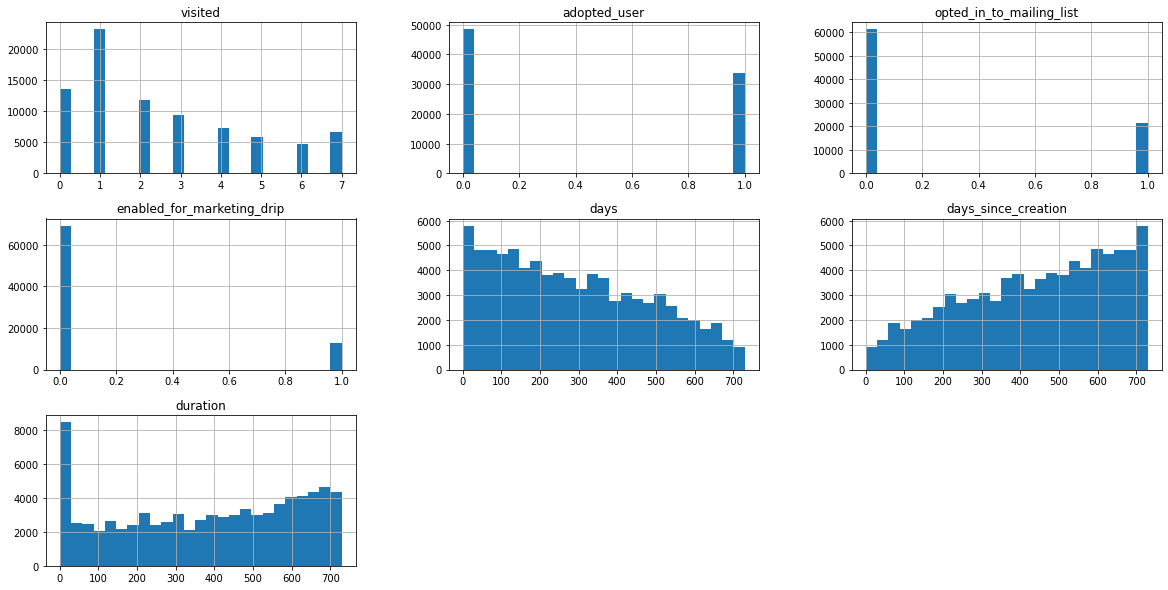

In [258]:
#Let us print histograms for each numeric features in our data
df_merge.hist(bins=25, figsize=(20,10))

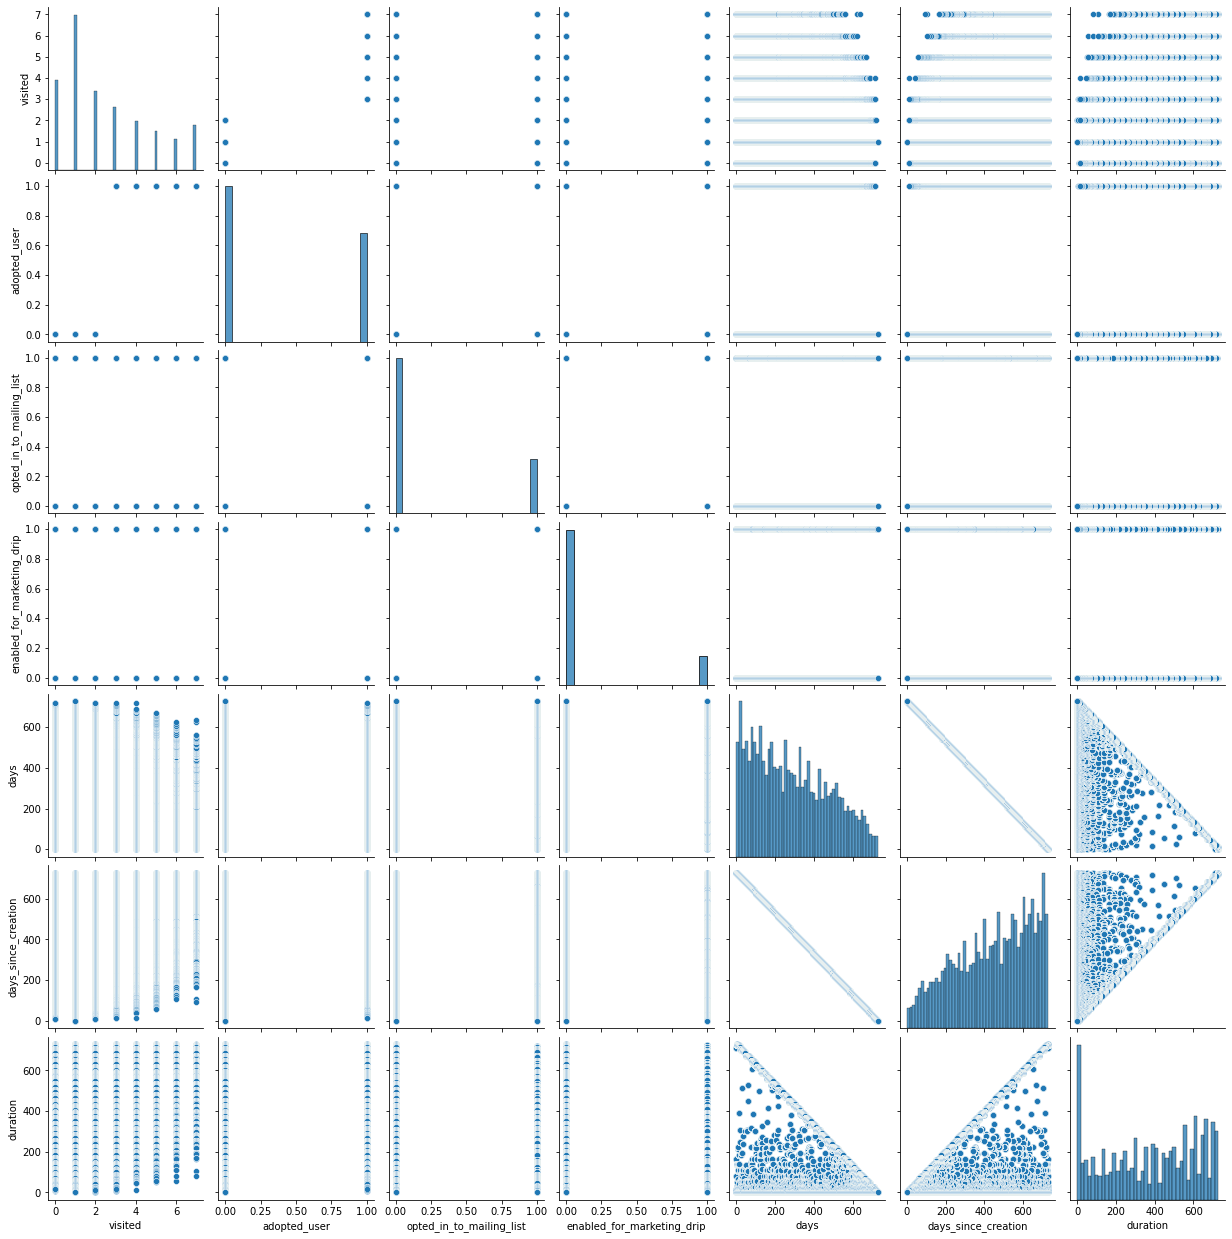

In [259]:
pplots=sns.pairplot(df_merge)

In [260]:
#Calculate the correlation coefficients
corr =df_merge.corr(method='pearson')
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

,visited,adopted_user,opted_in_to_mailing_list,enabled_for_marketing_drip,days,days_since_creation,duration
visited,1.000000,0.860000,0.000000,-0.010000,-0.350000,0.350000,0.500000
adopted_user,0.860000,1.000000,0.000000,-0.020000,-0.310000,0.310000,0.470000
opted_in_to_mailing_list,0.000000,0.000000,1.000000,0.500000,0.000000,-0.000000,-0.000000
enabled_for_marketing_drip,-0.010000,-0.020000,0.500000,1.000000,-0.020000,0.020000,0.020000
days,-0.350000,-0.310000,0.000000,-0.020000,1.000000,-1.000000,-0.770000
days_since_creation,0.350000,0.310000,-0.000000,0.020000,-1.000000,1.000000,0.770000
duration,0.500000,0.470000,-0.000000,0.020000,-0.770000,0.770000,1.000000


In [261]:
#'days' and 'days_since_creation' are correlated. There is no point of using both in our model. Let us drop 'days'.
df_merge=df_merge.drop(columns='days', axis=1)
df_merge.head()

,visited,adopted_user,opted_in_to_mailing_list,enabled_for_marketing_drip,days_since_creation,duration
0,1,0,0,0,729.0,3.0
1,1,0,0,0,729.0,1.0
2,1,0,0,0,729.0,81.0
3,0,0,0,0,729.0,81.0
4,0,0,0,0,729.0,81.0


# **Pre-Processing and Training Data Development**

In [262]:
# X is our prodictor variable
X=df_merge.drop(['adopted_user'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82282 entries, 0 to 82281
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   visited                     82282 non-null  int64  
 1   opted_in_to_mailing_list    82282 non-null  int64  
 2   enabled_for_marketing_drip  82282 non-null  int64  
 3   days_since_creation         82282 non-null  float64
 4   duration                    82282 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 3.1 MB


In [263]:
# y is our target variable which is the 'adopted_user' column
y=df_merge['adopted_user']

In [264]:
#Let us flatenned our variable y by calling the ravel() function on y
y=y.ravel()

In [265]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [266]:
# we use the StandardScaler() method of the preprocessing package
# and call the fit() mehtod with X as parameter.
scaler = preprocessing.StandardScaler().fit(X)

In [267]:
# We declare a variable called X_scaled 
X_scaled=scaler.transform(X)

In [268]:
#Let us split our data into training and testing
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y, test_size=0.2, random_state=1, stratify=y)

#**MODELING**

In [269]:
#We will use sklearn logistic regression to fit the model on our training data
cls=LogisticRegression()
cls.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

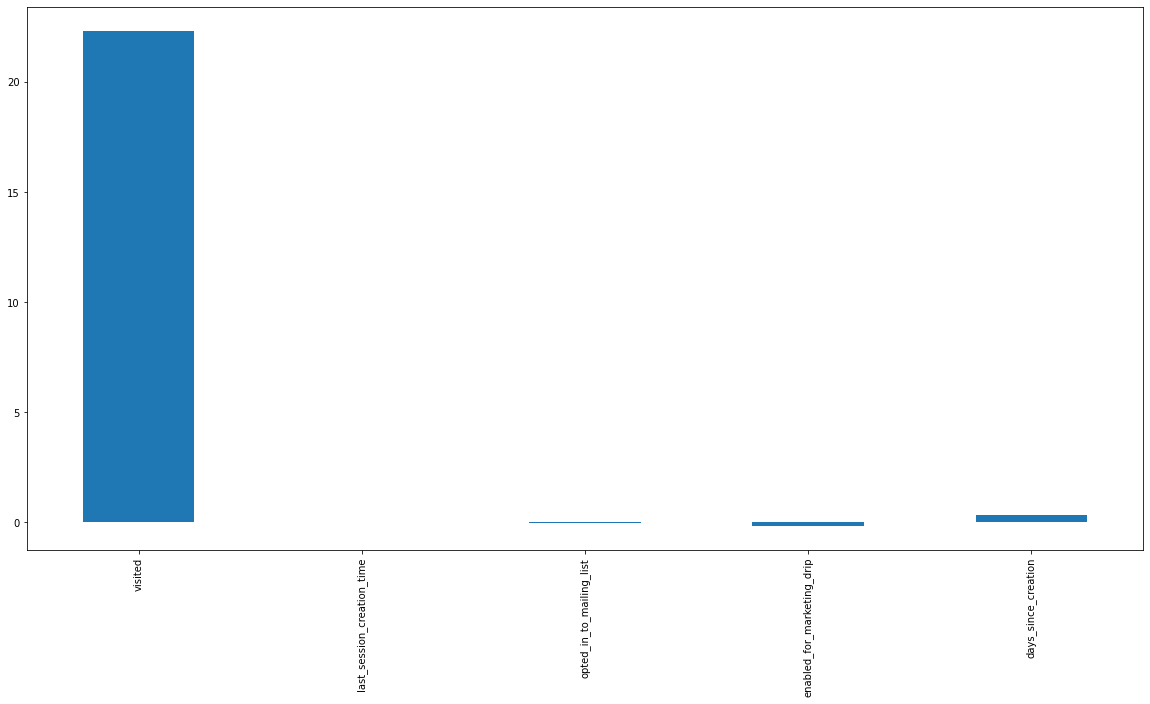

In [270]:
#Let us plot the coeficient of our model
X_train_pd=pd.DataFrame(data=X_train, index=None, columns=['visited',	'last_session_creation_time',	'opted_in_to_mailing_list',	'enabled_for_marketing_drip',	'days_since_creation'])
coefs=pd.Series(cls.coef_[0], index=X_train_pd.columns)
plt.figure(figsize=(20,10))
coefs.plot(kind='bar')

##**The plot of coefficient shows us that the column 'visited' is the major factor predicting 'adopted_user' values.**

In [271]:
#Let us see the coefficient
#coef=coefs.sort_values(by=['Coefficient'],ascending=False)
coefs

visited                       22.294337
last_session_creation_time    -0.003195
opted_in_to_mailing_list      -0.017951
enabled_for_marketing_drip    -0.151777
days_since_creation            0.317804
dtype: float64

## **Almost all the other predictors are almost negligeable compare to the predictor 'visited' since their coefficient is almost zero but 22.29 for the 'visited' factor.**